In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn

In [2]:
advertising = pd.read_csv('./advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
import warnings
warnings.filterwarnings('ignore')

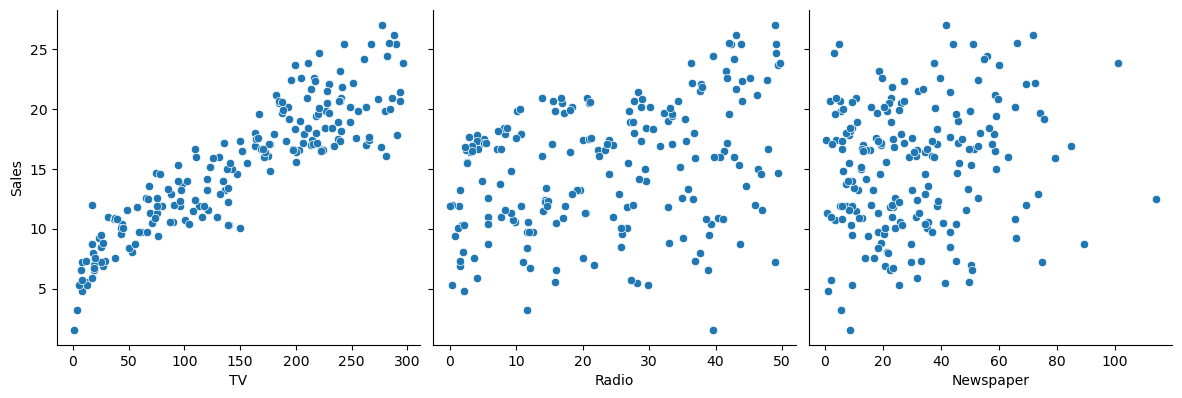

In [4]:
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter', size=4, aspect=1)
plt.show()

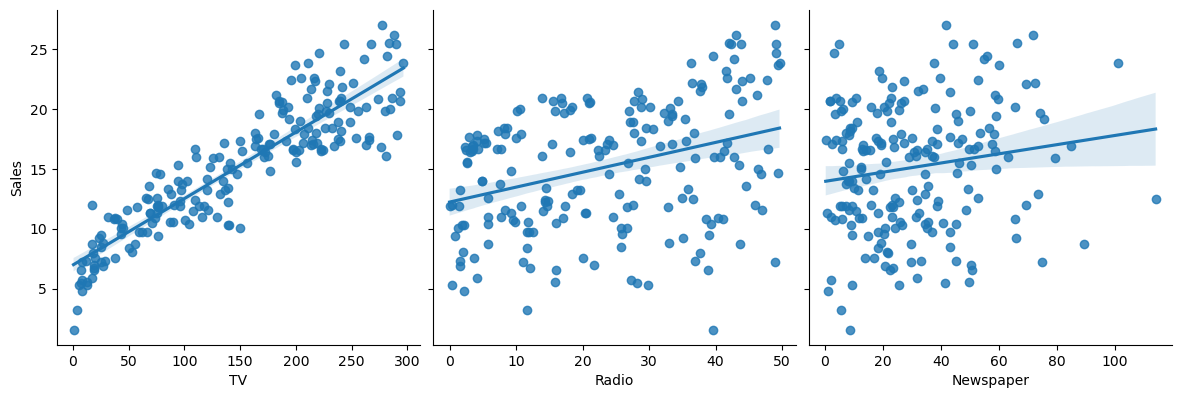

In [5]:
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', size=4, aspect=1)
plt.show()

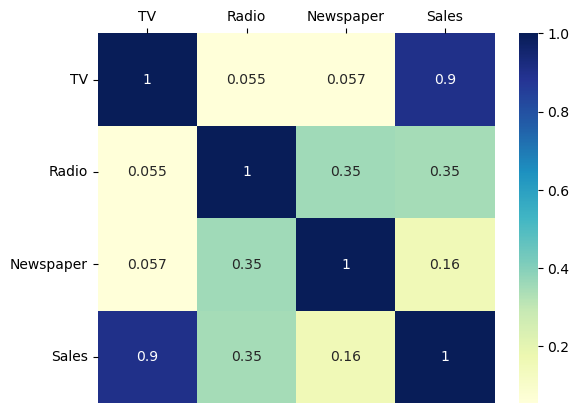

In [6]:
ax= sns.heatmap(advertising.corr(), annot=True, cmap='YlGnBu', fmt='.2g') # cmap='coolwarp'
ax.xaxis.tick_top()
plt.yticks(rotation=0)
#plt.xticks(rotation=90)
plt.show()

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$Sales = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

#### Steps:

- **Create X and y (indepndent and target variables)**
- **Create train and test sets (70:20,  80:20)**
##### Build the model
- **Train your model on training set (i.e learn the coefficients)**
##### Evaluate the model (on train and test sets)
- **Get errors and analyze it (Find the the y_train_pred using lr object and calculate the diff btw y_train and y_train_actual)**
- **Calcalte the y_pred on X_test independt variable and calucalte the difference**

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [7]:
X = advertising['TV'] # X means adv on TV in lakhs
y= advertising['Sales']  # sales in crore

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,  random_state = 100, shuffle=True)

In [10]:
print(X_train.head())

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64


In [11]:
print(type(X_train))
print()
print(type(X_test))
print()
print(type(y_train))
print()
print(type(y_test))

<class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>


In [12]:
pd.DataFrame(data = {'X_train_TV': X_train, 'X_train_Sales': y_train})

,X_train_TV,X_train_Sales
74,213.4,17.0
3,151.5,16.5
185,205.0,22.6
26,142.9,15.0
90,134.3,14.0
...,...,...
87,110.7,16.0
103,187.9,19.7
67,139.3,13.4
24,62.3,9.7


In [13]:
pd.DataFrame(data = {'X_test_TV': X_test, 'y_test_Sales': y_test}).head()

,X_test_TV,y_test_Sales
126,7.8,6.6
104,238.2,20.7
99,135.2,17.2
92,217.7,19.4
111,241.7,21.8


#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [14]:
import statsmodels.api as sm

In [15]:
X_train_sm = sm.add_constant(X_train, prepend=False)

In [16]:
# y = c.const + m1.TV

In [17]:
X_train_sm

,TV,const
74,213.4,1.0
3,151.5,1.0
185,205.0,1.0
26,142.9,1.0
90,134.3,1.0
...,...,...
87,110.7,1.0
103,187.9,1.0
67,139.3,1.0
24,62.3,1.0


In [18]:
type(X_train_sm)

pandas.core.frame.DataFrame

### Fit the resgression line using 'OLS'

In [19]:
# Fit the resgression line using 'OLS'
sm_lr = sm.OLS(y_train, X_train_sm).fit()

In [20]:
sm_lr

In [21]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
sm_lr.params

TV       0.054546
const    6.948683
dtype: float64

In [22]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.52e-52
Time:                        11:57:42   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0545      0.002     24.722      0.0

---
#### The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

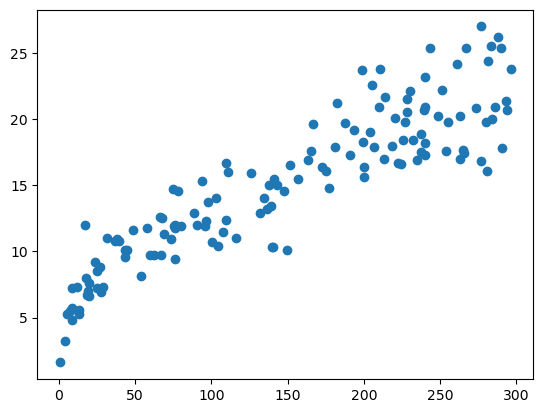

In [23]:
plt.scatter(X_train, y_train)
plt.show()

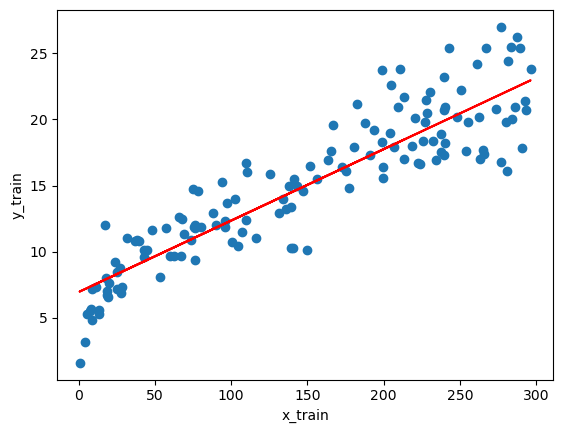

In [24]:
ax = plt.scatter(x=X_train, y=y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.yticks(rotation=0)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

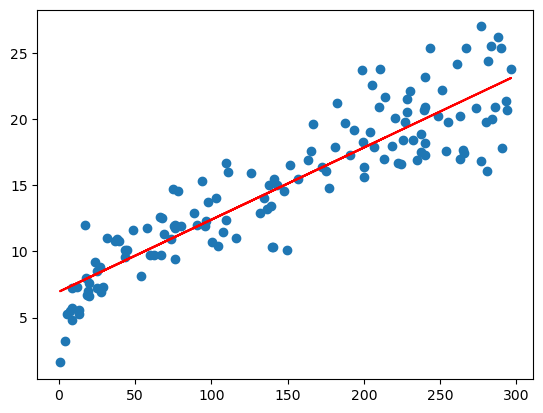

In [25]:
plt.scatter(X_train, y_train, cmap='lightseagreen' )
plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r' )
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [26]:
y_train_pred = sm_lr.predict(X_train_sm)
res = y_train - y_train_pred

In [27]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

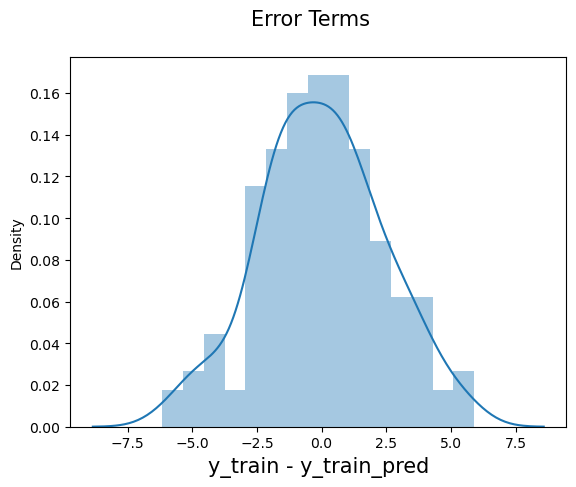

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

In [29]:
#### Looking for patterns in the residuals

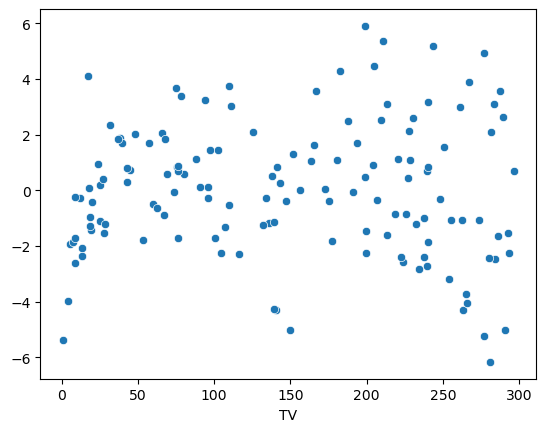

In [30]:
sns.scatterplot(x=X_train, y=res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [31]:
# Add a constant to X_test
X_test_sm= sm.add_constant(X_test)

In [32]:
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [33]:
# Predict the y values corresponding to X_test_sm
y_pred = sm_lr.predict(X_test_sm)

In [34]:
y_pred.head()

126      54.254275
104    1655.230884
99      939.516514
92     1512.782878
111    1679.551275
dtype: float64

##### Looking at the RMSE

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1096.7967586838836

###### Checking the R-squared on the test set

In [37]:
r_squared = r2_score(y_test, y_pred)
r_squared

-61332.85056609083

##### Visualizing the fit on the test set

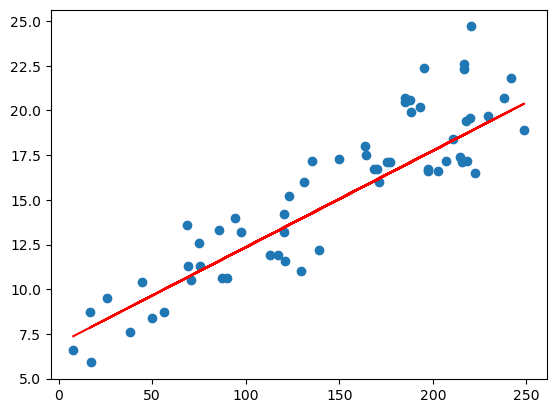

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [39]:
errors = (y_train_pred - y_train)
errors

74     1.588747
3     -1.287635
185   -4.469437
26    -0.256729
90     0.274178
         ...   
87    -3.013102
103   -2.502170
67     1.146907
24     0.646884
8      2.617777
Length: 140, dtype: float64

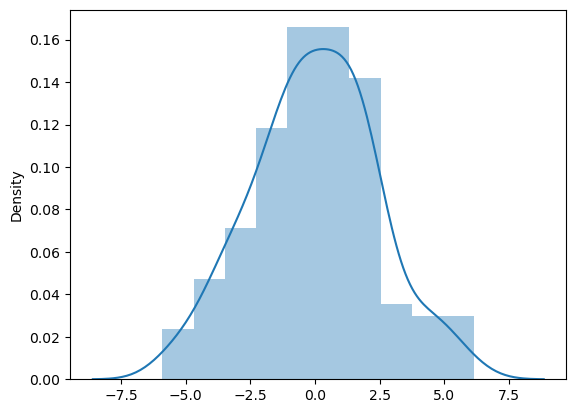

In [40]:
sns.distplot(errors)
plt.show()

In [41]:
sm_lr

In [73]:
pd.DataFrame( {'TV': X_test, 'Const':X_test_sm['const'] ,  'Sales': y_test})

,TV,Const,Sales
126,7.8,1.0,6.6
104,238.2,1.0,20.7
99,135.2,1.0,17.2
92,217.7,1.0,19.4
111,241.7,1.0,21.8
167,206.8,1.0,17.2
116,139.2,1.0,12.2
96,197.6,1.0,16.7
52,216.4,1.0,22.6
69,216.8,1.0,22.3


In [74]:
# add const/intercept to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [76]:
#  Predicaiton and evaluaiton on test set
y_test_pred = sm_lr.predict(X_test_sm)
y_test_pred.head()

126      54.254275
104    1655.230884
99      939.516514
92     1512.782878
111    1679.551275
dtype: float64

In [77]:
res = y_test - y_test_pred
res.head(10)

126     -47.654275
104   -1634.530884
99     -922.316514
92    -1493.382878
111   -1657.751275
167   -1419.842232
116    -955.111247
96    -1356.414346
52    -1481.149590
69    -1484.229064
dtype: float64

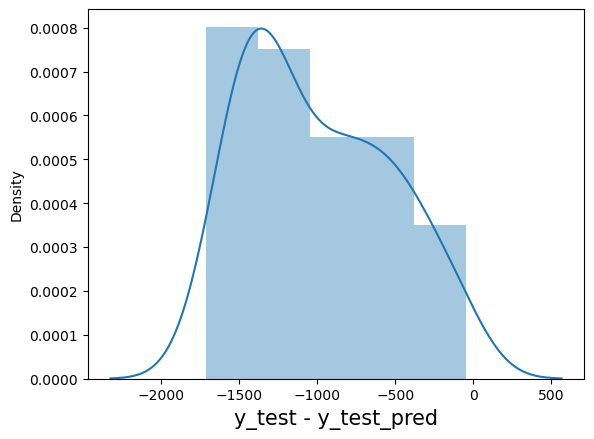

In [78]:
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)
plt.show()

In [79]:
sm_lr.params

TV       0.054546
const    6.948683
dtype: float64

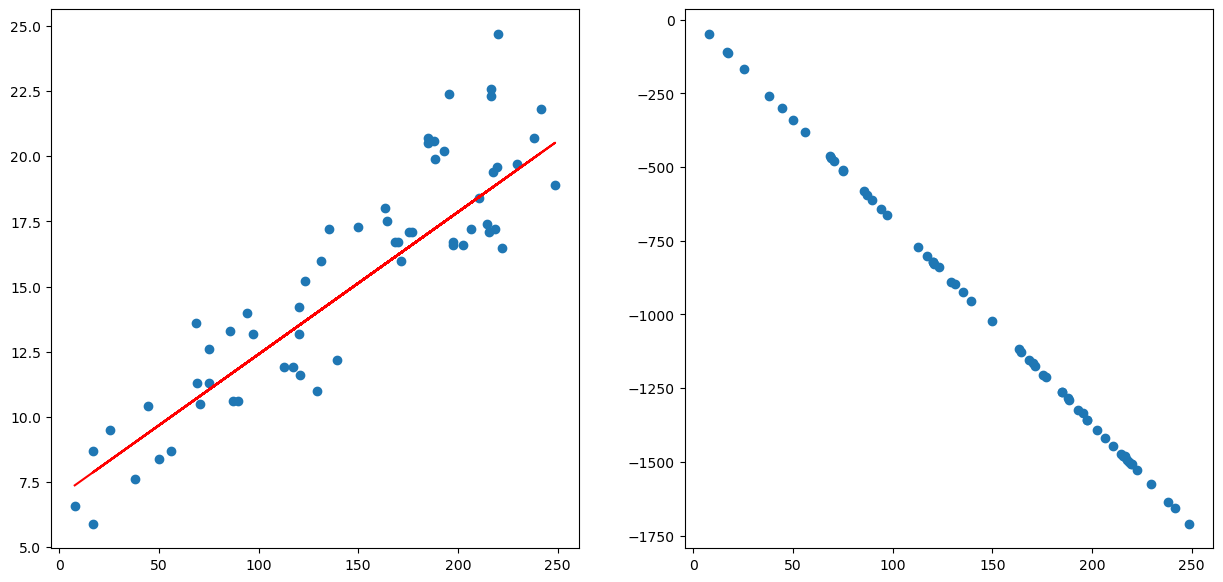

In [80]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948683 + 0.054546 * X_test, 'r')

plt.subplot(1, 2, 2)
plt.scatter(X_test, res)
plt.show()

In [81]:
# evaluate trained model on test set data
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [82]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

-61332.85056609083

In [83]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.8157933136480389

In [84]:
mse(y_true=y_test, y_pred=y_test_pred)

1202963.129859473

In [85]:
mse(y_true=y_train, y_pred=y_train_pred)

5.752400386486836

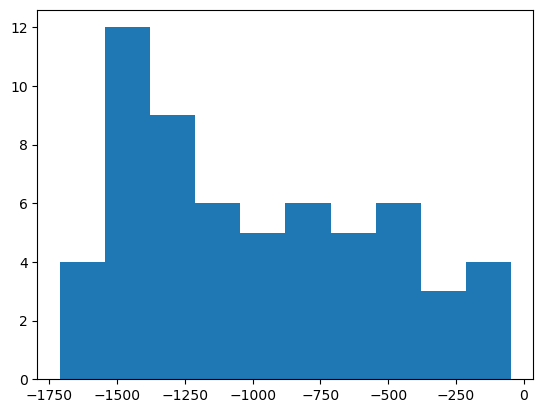

In [91]:
plt.hist(res, histtype='bar')
plt.show()

## Build model and evaluate using SKLearn library

In [95]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
#1.  create object of linearRegression model
lrm = LinearRegression()

In [103]:
print(X_train.shape)
print(type(X_train))

(140,)
<class 'pandas.core.series.Series'>


In [106]:
# reshape X_train into (n, 1)
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [107]:
print(X_train_lm.shape)
print(type(X_train_lm))

(140, 1)
<class 'numpy.ndarray'>


In [108]:
# Build the model (learn the co-efficient and intercpet)
lrm.fit(X= X_train_lm, y=y_train)

LinearRegression()

In [110]:
# evaluate the parameters
print(lrm.coef_)
print(lrm.intercept_)

[0.05454575]
6.94868320000136


In [112]:
# 3. Predications
y_train_pred = lrm.predict(X_train_lm)

In [113]:
# 3. Predications
y_test_pred = lrm.predict(X_test_lm)

In [111]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse

In [118]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566


In [119]:
print(rmse(y_true=y_train, y_pred=y_train_pred))
print(rmse(y_true=y_test, y_pred=y_test_pred))

5.752400386486837
4.07755637182695


In [121]:
res = y_test - y_test_pred
res

126   -0.774140
104    0.758518
99     2.876731
92     0.576706
111    1.667608
167   -1.028745
116   -2.341452
96    -1.026924
52     3.847616
69     3.525798
164   -1.441445
124    0.233067
182   -1.314155
154    3.407624
125   -1.105073
196    1.913107
194    2.185818
177    0.467630
163    2.133086
31    -1.206899
11    -1.259656
73    -3.006904
15     4.793077
41     0.496719
97     3.465807
128    5.734887
133    0.662160
82     0.244022
139    3.665807
123    1.536735
83     2.920387
65     0.587660
151   -1.948719
162    2.674897
170   -1.275971
77     0.678554
32     0.949470
173    0.565812
174   -2.579659
85     2.713077
168   -1.597838
112    0.567628
171    1.578540
181   -1.666930
7     -0.305083
46    -1.241437
75     0.829494
28    -1.619667
29    -0.299613
195   -1.432331
40    -1.394198
153   -0.292371
115    1.554931
64     1.900369
59    -0.041473
1      1.024031
192   -1.986870
136    1.154946
152   -1.126924
161    1.676746
Name: Sales, dtype: float64

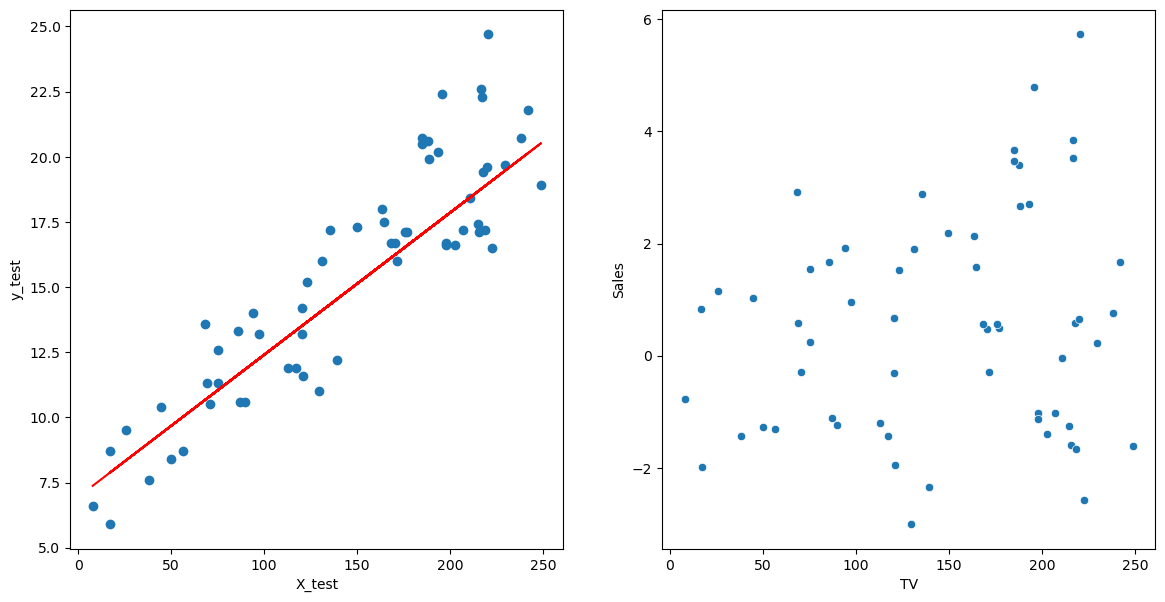

In [131]:
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(X_test, y_test_pred, 'r')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test, y= res)
plt.show()

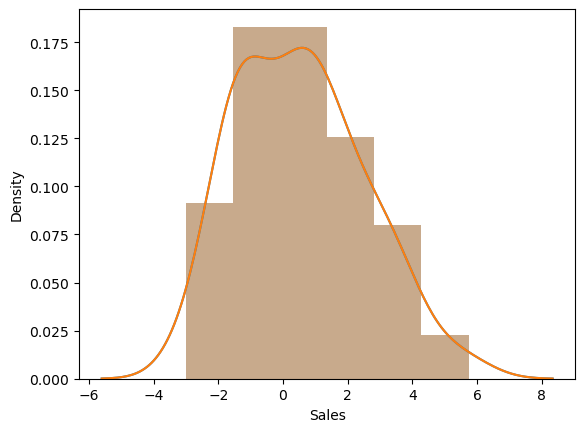

In [133]:
sns.distplot(res)
plt.show()

In [136]:
corr = advertising[['TV', 'Sales']].corr()
corr

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


In [137]:
corr**2

,TV,Sales
TV,1.000000,0.812176
Sales,0.812176,1.000000
